In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
df.describe(include=[np.number])   # summary stats
df.isna().sum()                    # missing values


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
z_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = df[z_cols].apply(lambda col: (col - col.mean())/col.std(ddof=0))
outliers = (z.abs() > 3)

# Median imputation
for col in z_cols + ["Tamb","RH"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Drop extreme outliers
df_clean = df[(~outliers).all(axis=1)].copy()


In [4]:
df_clean.to_csv("../data/sierraleone-bumbuna_clean.csv", index=False)


Text(0.5, 1.0, 'Solar Irradiance vs Time')

c:\Users\Hp\Desktop\solar-challenge-week1\solar-challenge-week1\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Hp\Desktop\solar-challenge-week1\solar-challenge-week1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


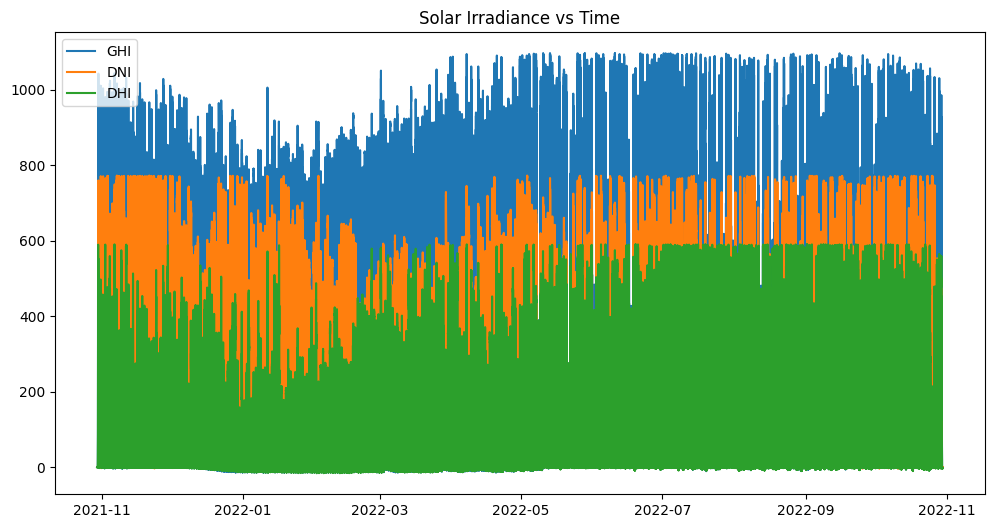

In [5]:
plt.figure(figsize=(12,6))
for c in ["GHI","DNI","DHI"]:
    if c in df_clean.columns:
        plt.plot(df_clean["Timestamp"], df_clean[c], label=c)
plt.legend(); plt.title("Solar Irradiance vs Time")


<Axes: xlabel='WS', ylabel='GHI'>

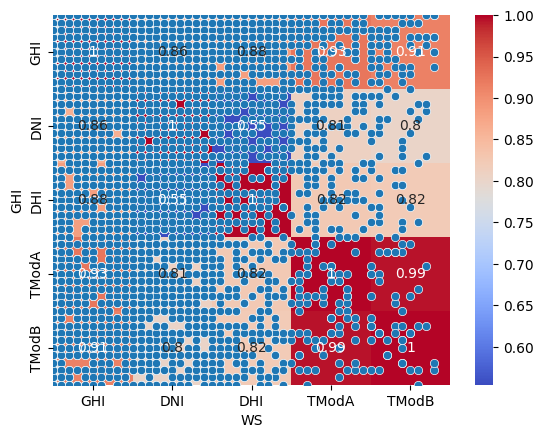

In [6]:
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(),
            annot=True, cmap="coolwarm")

sns.scatterplot(data=df_clean, x="WS", y="GHI")
sns.scatterplot(data=df_clean, x="RH", y="Tamb")


Text(0.5, 1.0, 'Bubble Chart: GHI vs Tamb (size=RH)')

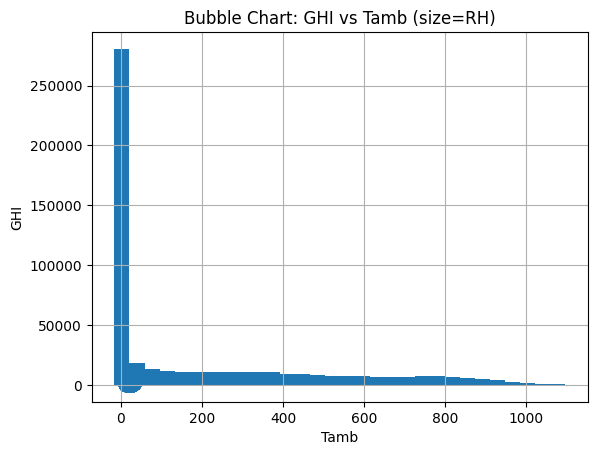

In [7]:
df_clean["GHI"].hist(bins=30)
df_clean["WS"].hist(bins=30)

plt.scatter(df_clean["Tamb"], df_clean["GHI"],
            s=df_clean["RH"], alpha=0.5)
plt.xlabel("Tamb"); plt.ylabel("GHI")
plt.title("Bubble Chart: GHI vs Tamb (size=RH)")
